In [1]:
import warnings

import tensorflow 
import torch

from tf_adan.test_adan_sparse import _test_sparse
from tf_adan.test_adan_dense import _test_dense
from tf_adan.utils import plot_loss_curves_from_results

2022-10-01 19:59:22.368650: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2022-10-01 19:59:22.368707: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
!pip freeze

absl-py==1.2.0
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens==2.0.8
astunparse==1.6.3
attrs==22.1.0
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==5.0.1
cachetools==5.2.0
certifi==2022.9.24
cffi==1.15.1
charset-normalizer==2.1.1
cycler==0.11.0
debugpy==1.6.3
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
executing==1.1.0
fastjsonschema==2.16.2
flatbuffers==22.9.24
fonttools==4.37.4
gast==0.3.3
google-auth==2.12.0
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
grpcio==1.49.1
h5py==2.10.0
idna==3.4
importlib-metadata==4.12.0
importlib-resources==5.9.0
ipykernel==6.16.0
ipython==8.5.0
ipython-genutils==0.2.0
jedi==0.18.1
Jinja2==3.1.2
jsonschema==4.16.0
jupyter-core==4.11.1
jupyter_client==7.3.5
jupyterlab-pygments==0.2.2
keras==2.10.0
Keras-Preprocessing==1.1.2
kiwisolver==1.4.4
libclang==14.0.6
lxml==4.9.1
Markdown==3.4.1
MarkupSafe==2.1.1
matplotlib==3.5.3
matplotlib-inline==0.1.6
mistune==2.0.4
nbclient==0.6.8
nbconvert==7.0.0
nbformat==5.6.1
nest-asyncio==1.5.6
not

In [3]:
PARAMS_GRID = [
    # paper params
    {
        'learning_rate': 0.001,
        'beta_1': 0.98,
        'beta_2': 0.92,
        'beta_3': 0.99,
        'weight_decay': 0.0
    },
    
    # paper params w decay 
    {
        'learning_rate': 0.001,
        'beta_1': 0.98,
        'beta_2': 0.92,
        'beta_3': 0.99,
        'weight_decay': 0.1
    },
    
    # test 1 
    {
        'learning_rate': 0.1,
        'beta_1': 0.5,
        'beta_2': 0.5,
        'beta_3': 0.5,
        'weight_decay': 0.5
    },
    
    # test 2
    {
        'learning_rate': 0.01,
        'beta_1': 0.999,
        'beta_2': 0.999,
        'beta_3': 0.999,
        'weight_decay': 0.0
    },
    
    # test 3
    {
        'learning_rate': 0.0001,
        'beta_1': 0.1,
        'beta_2': 0.1,
        'beta_3': 0.1,
        'weight_decay': 0.2
    },
]

# Test sparse - a few categories

In this example, each batch contain all possible categories of the categorical columns.

Training model with following params
{'learning_rate': 0.001, 'beta_1': 0.98, 'beta_2': 0.92, 'beta_3': 0.99, 'weight_decay': 0.0}


2022-10-01 19:59:25.327007: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-01 19:59:25.327071: W tensorflow/stream_executor/cuda/cuda_driver.cc:312] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-01 19:59:25.327095: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (0e25e7f89149): /proc/driver/nvidia/version does not exist
2022-10-01 19:59:25.327595: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-01 19:59:25.334505: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 219999500

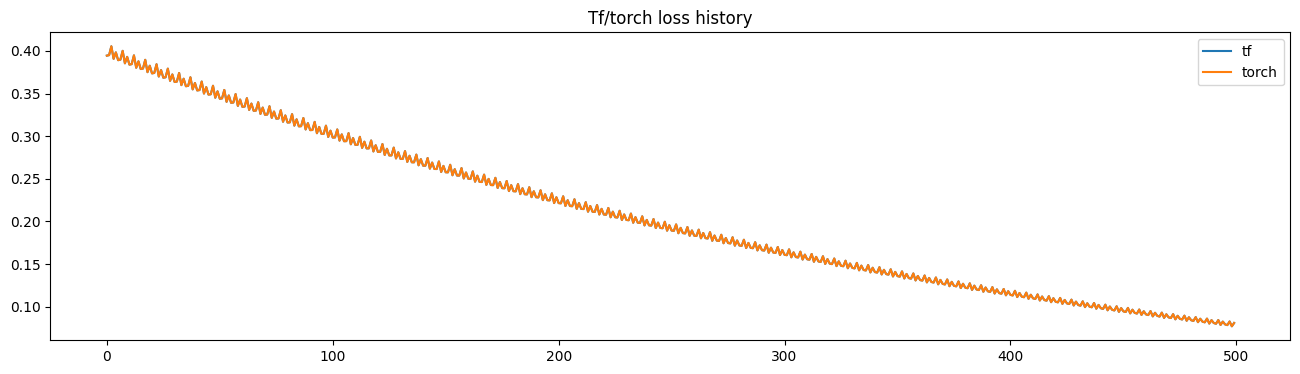

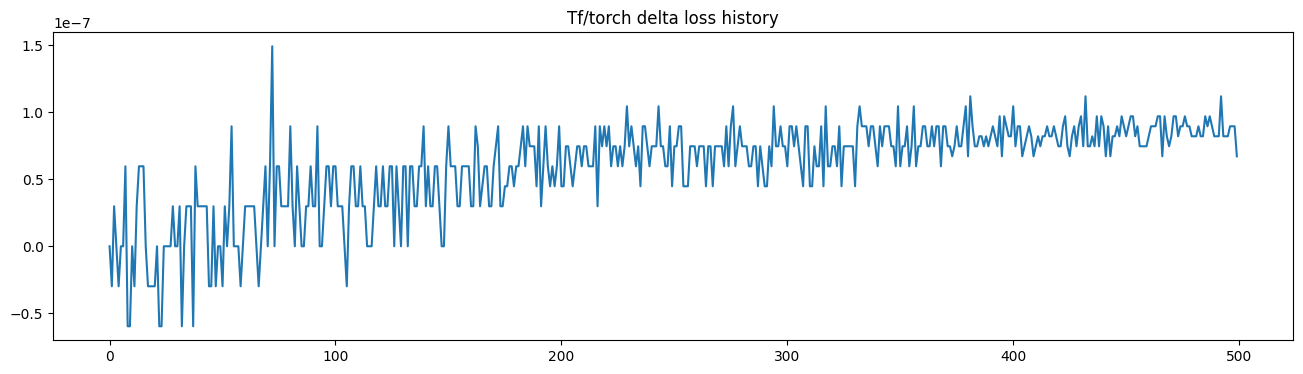

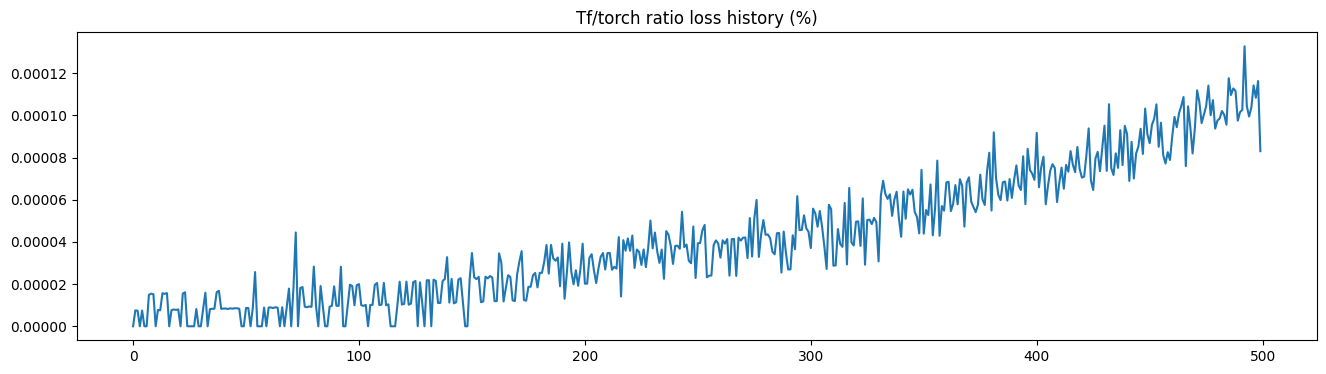




Training model with following params
{'learning_rate': 0.001, 'beta_1': 0.98, 'beta_2': 0.92, 'beta_3': 0.99, 'weight_decay': 0.1}


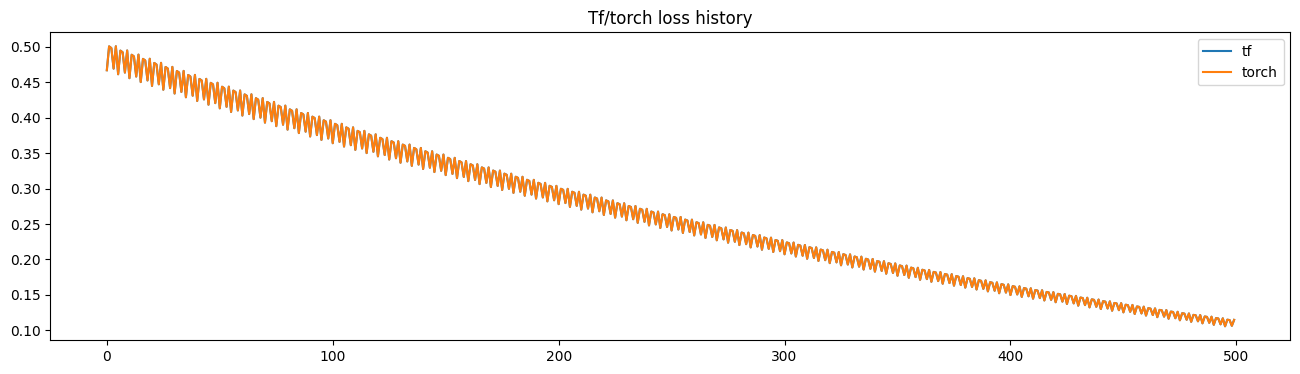

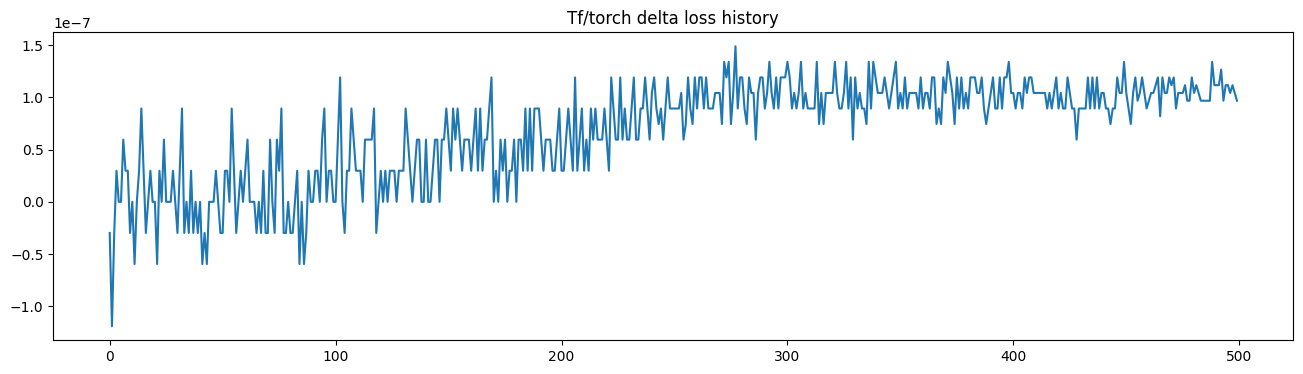

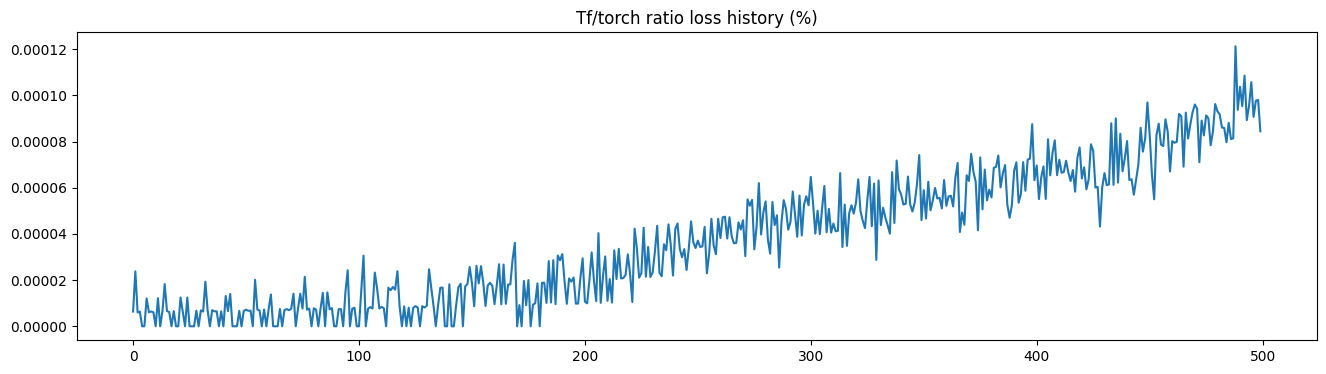




Training model with following params
{'learning_rate': 0.1, 'beta_1': 0.5, 'beta_2': 0.5, 'beta_3': 0.5, 'weight_decay': 0.5}


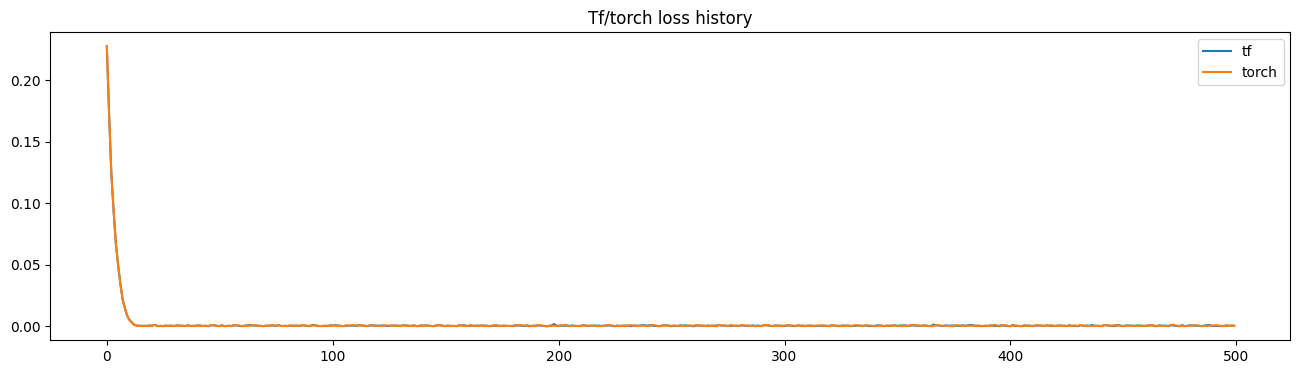

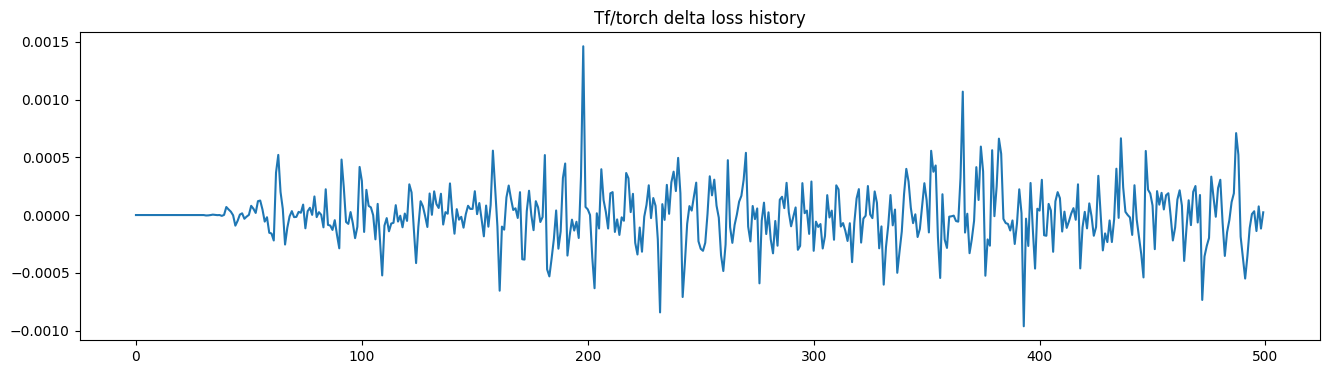

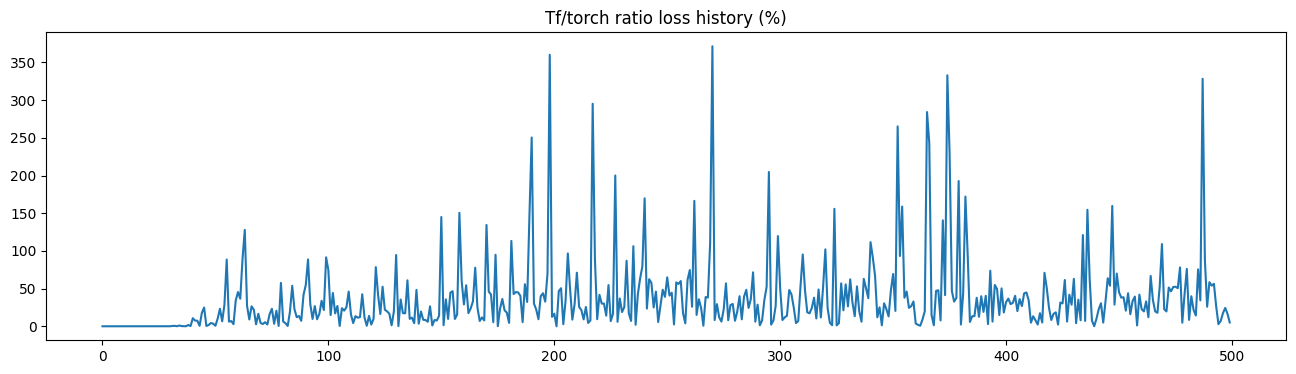




Training model with following params
{'learning_rate': 0.01, 'beta_1': 0.999, 'beta_2': 0.999, 'beta_3': 0.999, 'weight_decay': 0.0}


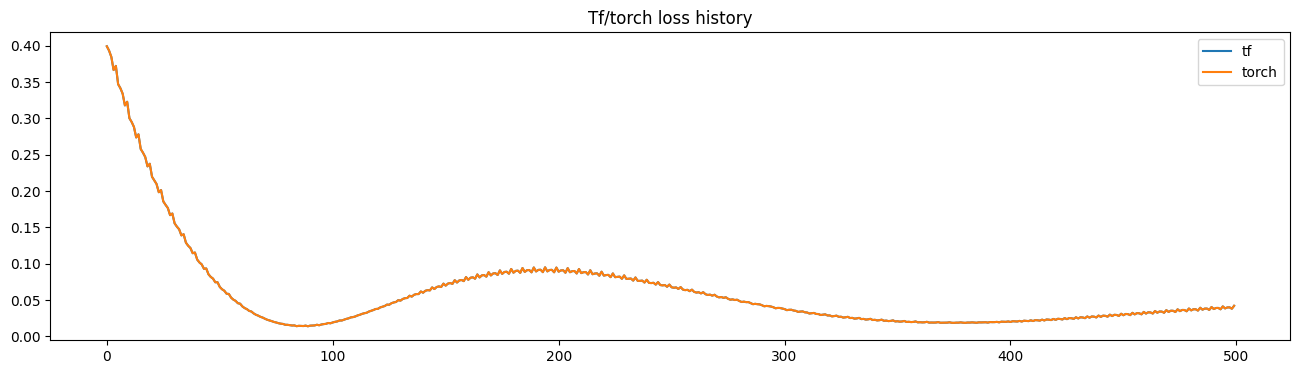

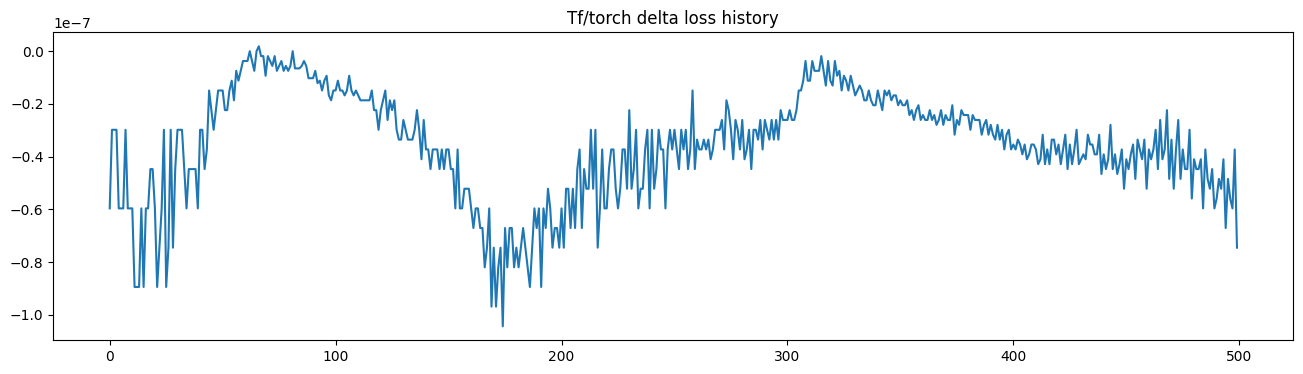

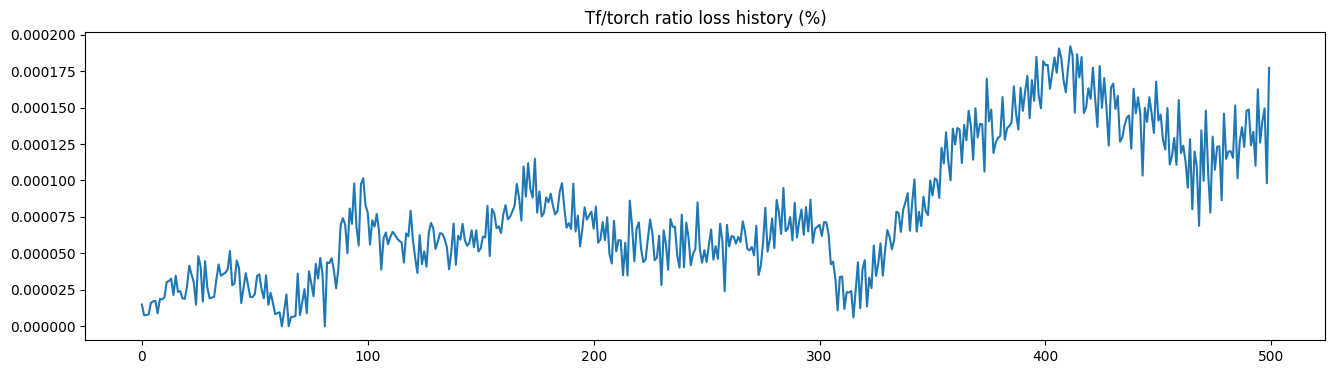




Training model with following params
{'learning_rate': 0.0001, 'beta_1': 0.1, 'beta_2': 0.1, 'beta_3': 0.1, 'weight_decay': 0.2}


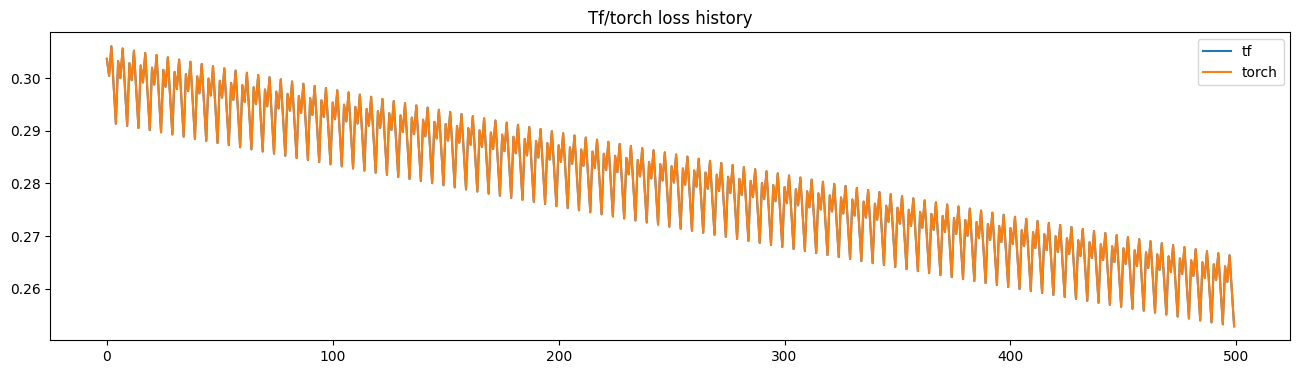

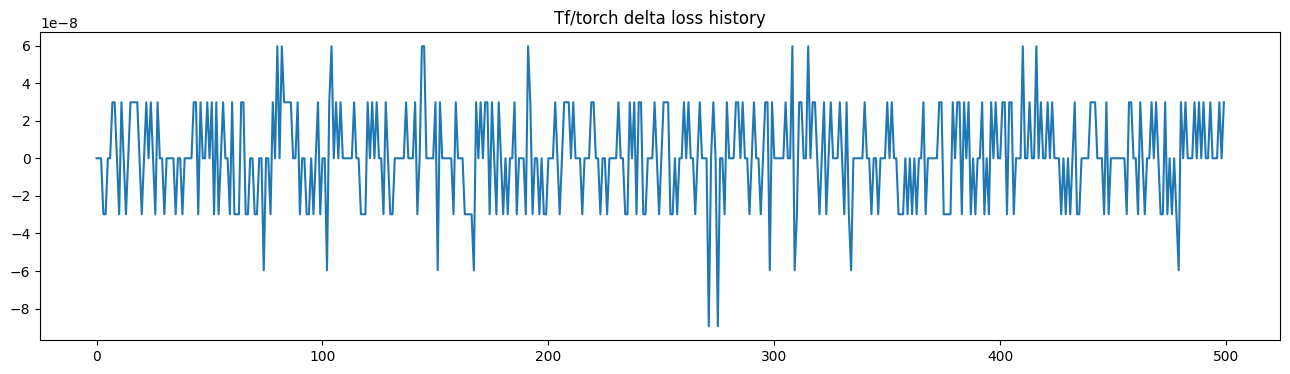

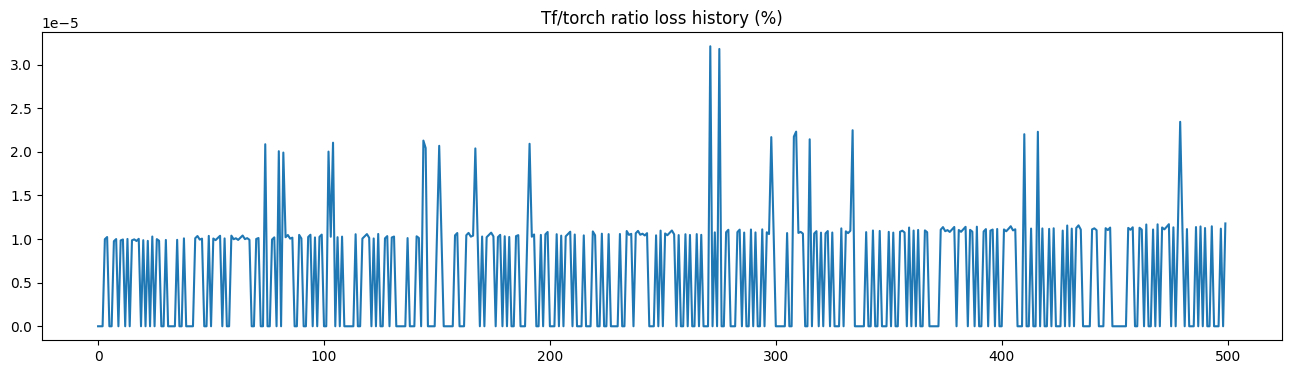

In [4]:
for params in PARAMS_GRID:
    print("Training model with following params")
    print(params)
    results = _test_sparse(n_samples=100, n_categories=5, **params)
    plot_loss_curves_from_results(results)
    print('\n\n')

# Test sparse - a lot of categories

In this example, each batch doesn't contain all possible categories of the categorical columns.  

Training model with following params
{'learning_rate': 0.001, 'beta_1': 0.98, 'beta_2': 0.92, 'beta_3': 0.99, 'weight_decay': 0.0}


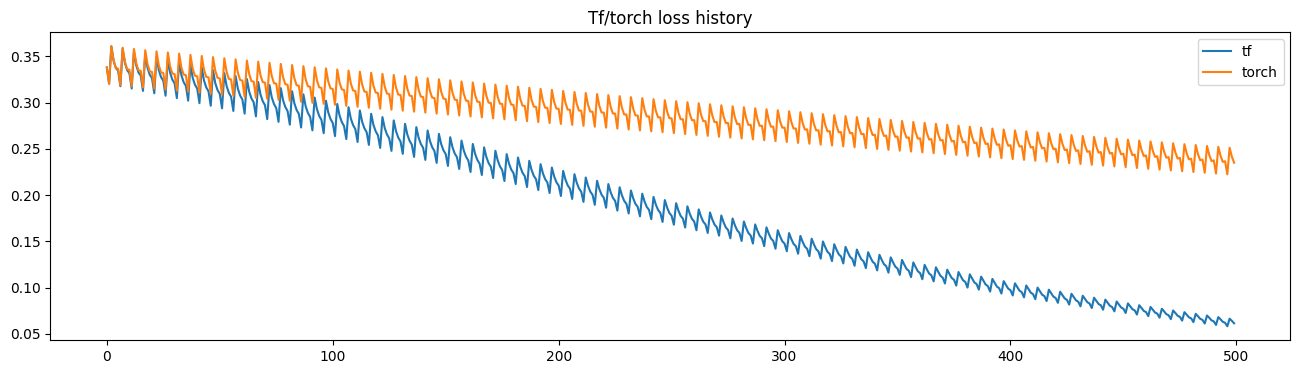

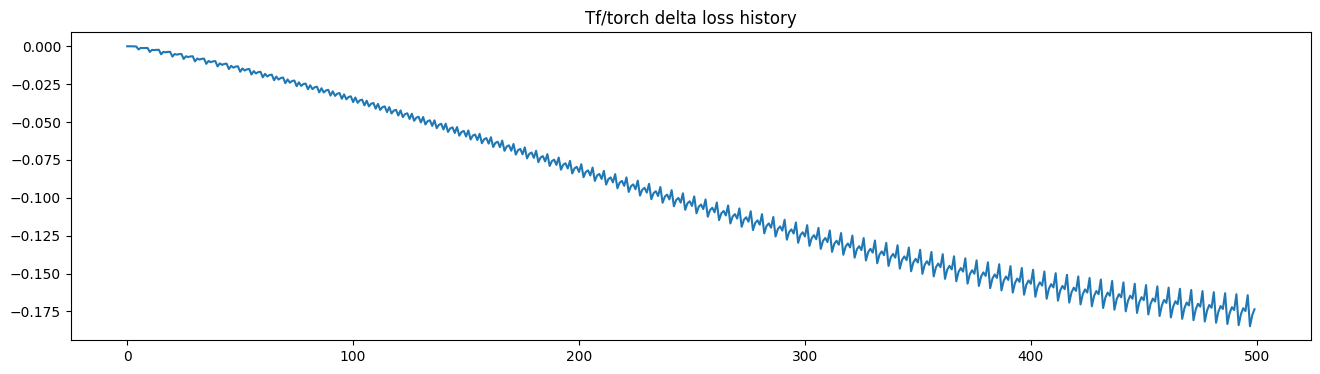

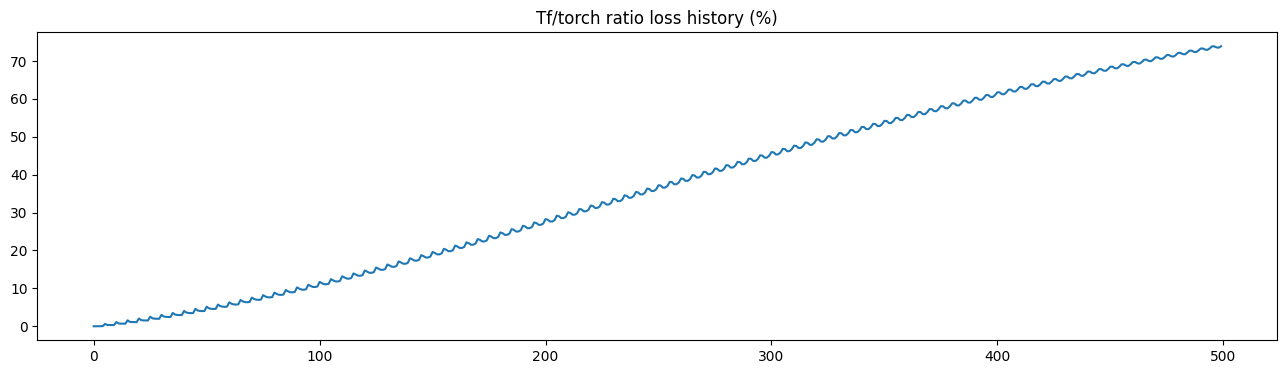




Training model with following params
{'learning_rate': 0.001, 'beta_1': 0.98, 'beta_2': 0.92, 'beta_3': 0.99, 'weight_decay': 0.1}


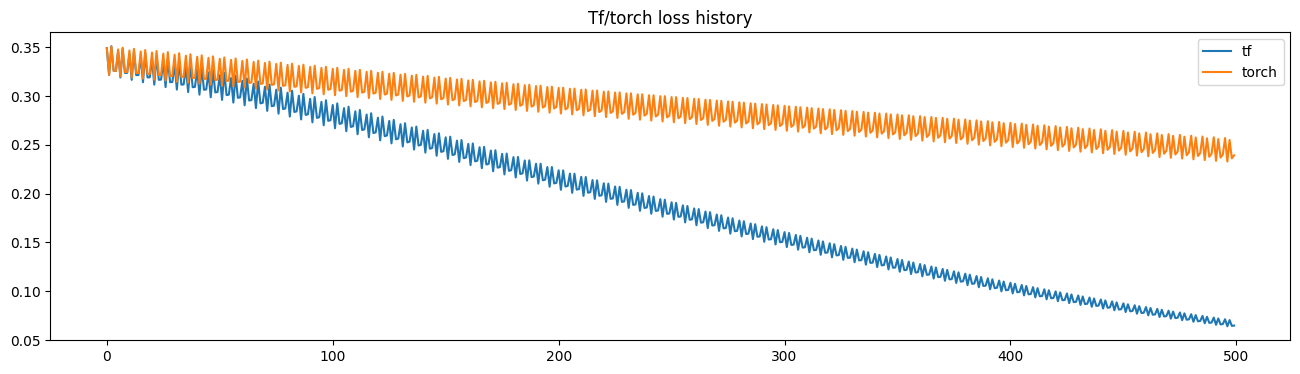

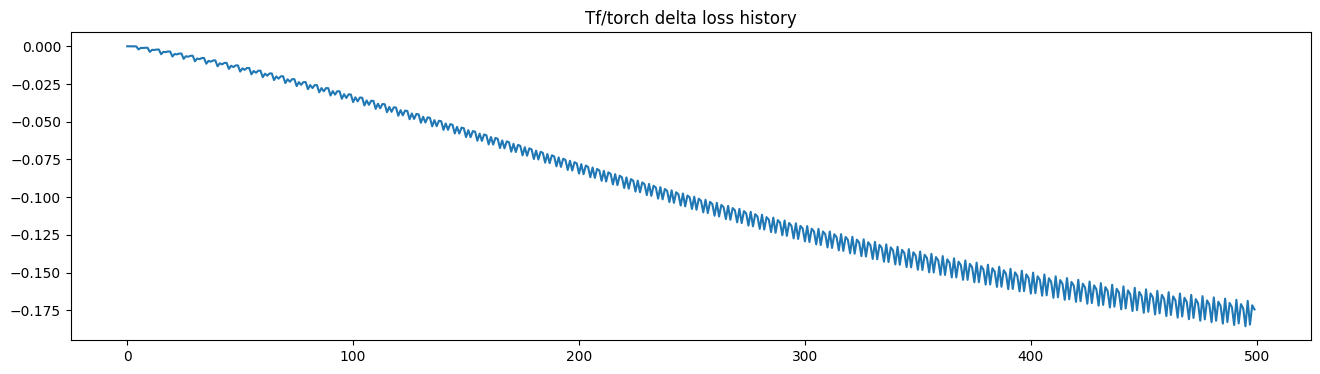

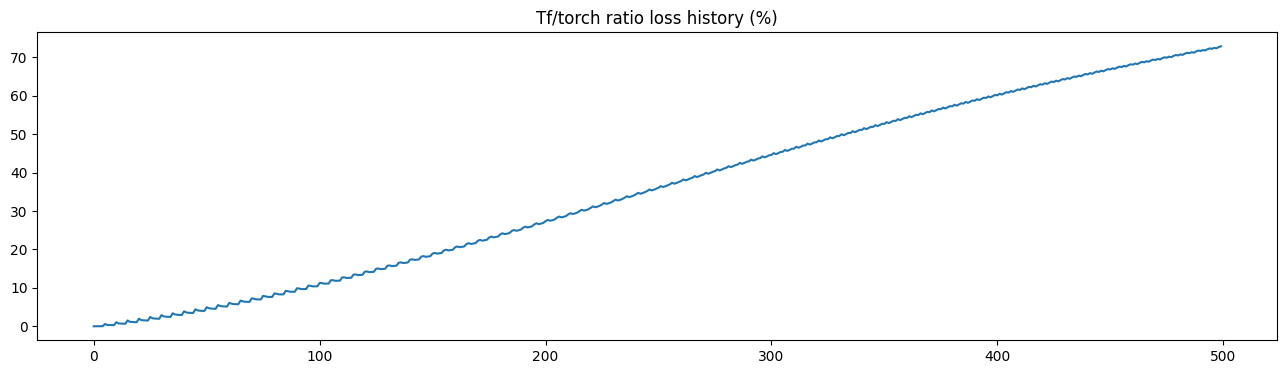




Training model with following params
{'learning_rate': 0.1, 'beta_1': 0.5, 'beta_2': 0.5, 'beta_3': 0.5, 'weight_decay': 0.5}


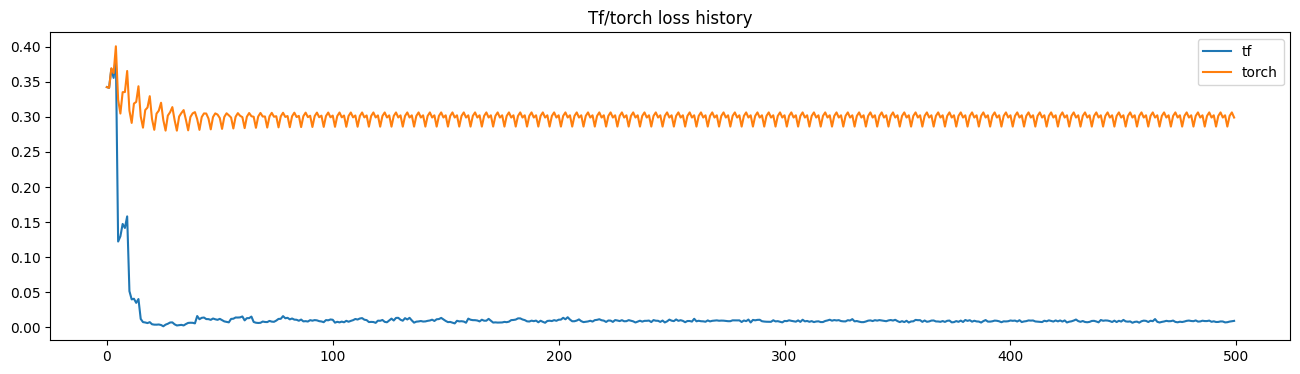

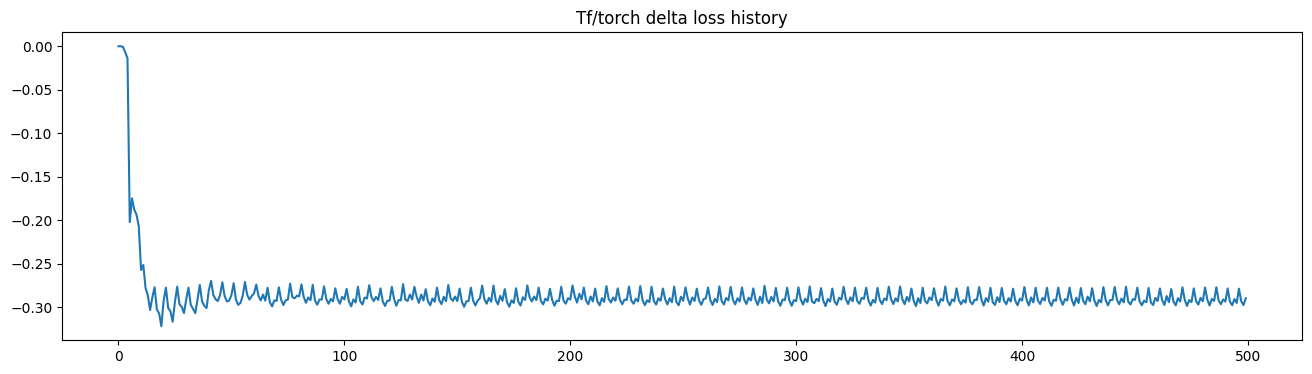

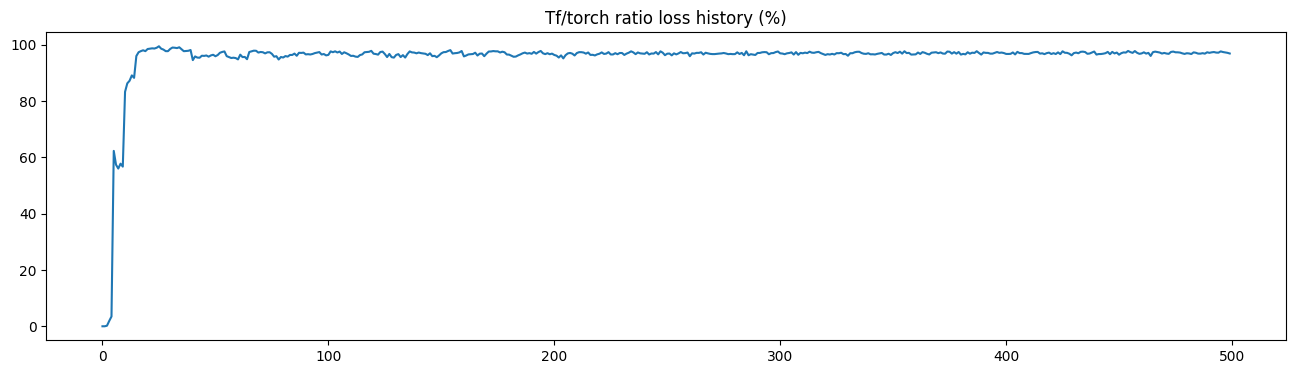




Training model with following params
{'learning_rate': 0.01, 'beta_1': 0.999, 'beta_2': 0.999, 'beta_3': 0.999, 'weight_decay': 0.0}


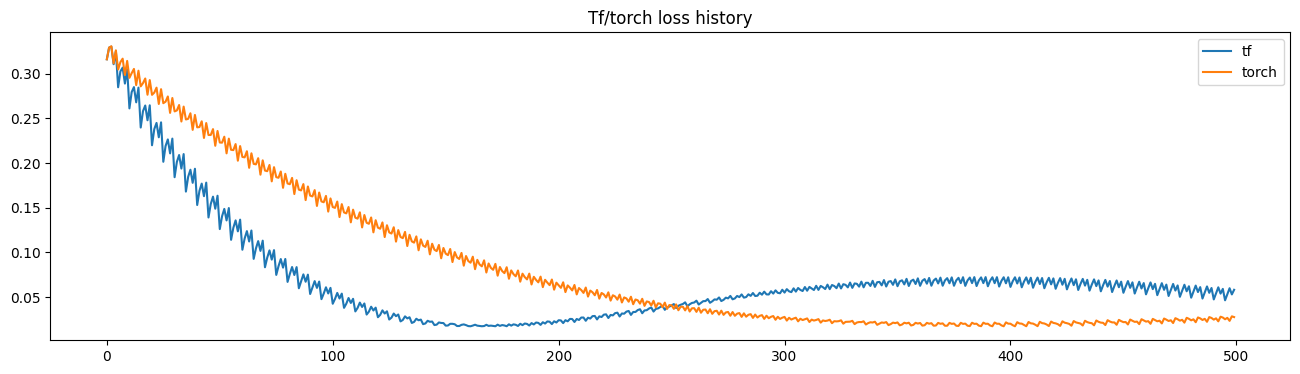

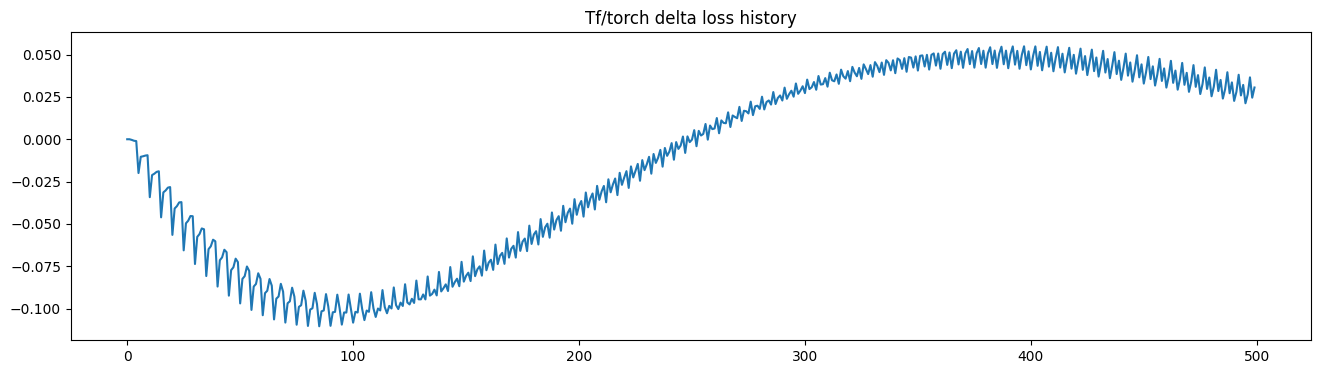

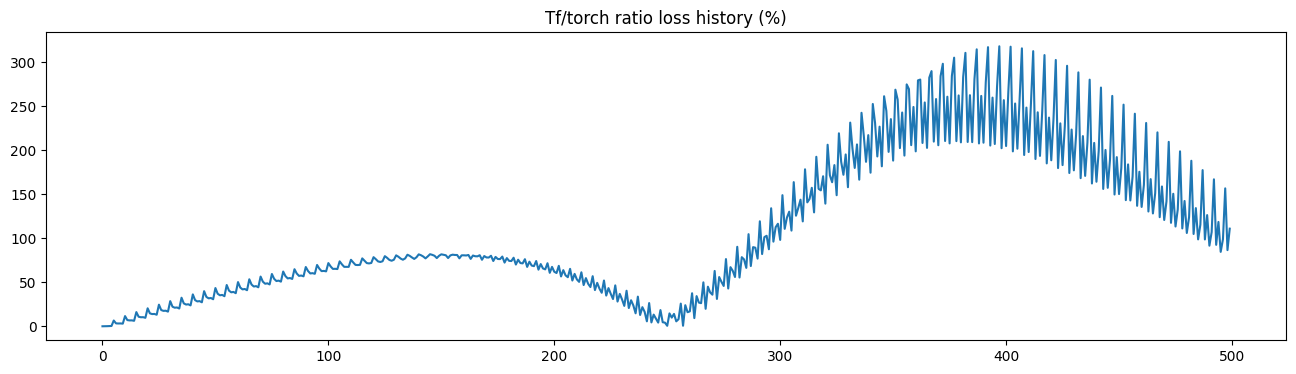




Training model with following params
{'learning_rate': 0.0001, 'beta_1': 0.1, 'beta_2': 0.1, 'beta_3': 0.1, 'weight_decay': 0.2}


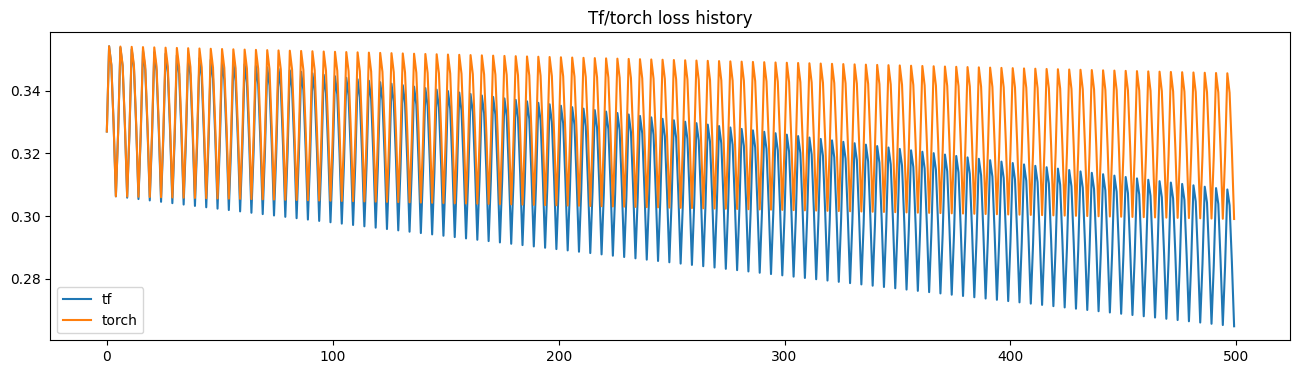

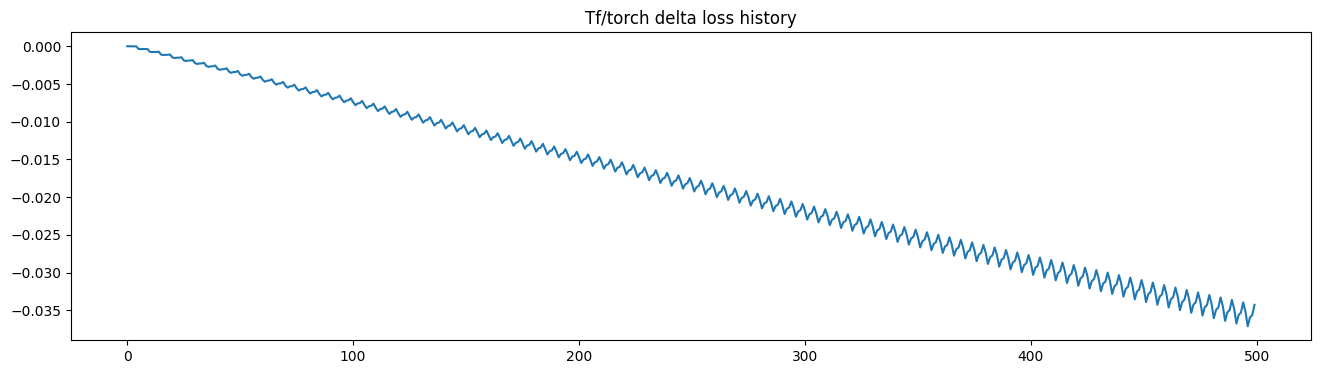

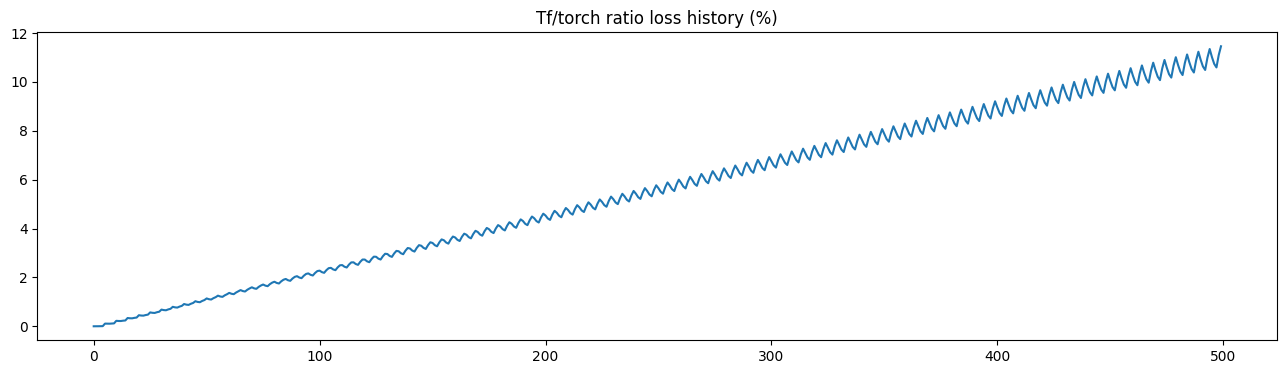

In [5]:
for params in PARAMS_GRID:
    print("Training model with following params")
    print(params)
    results = _test_sparse(n_samples=100, n_categories=2000, **params)
    plot_loss_curves_from_results(results)
    print('\n\n')


# Test dense

Training model with following params
{'learning_rate': 0.001, 'beta_1': 0.98, 'beta_2': 0.92, 'beta_3': 0.99, 'weight_decay': 0.0}


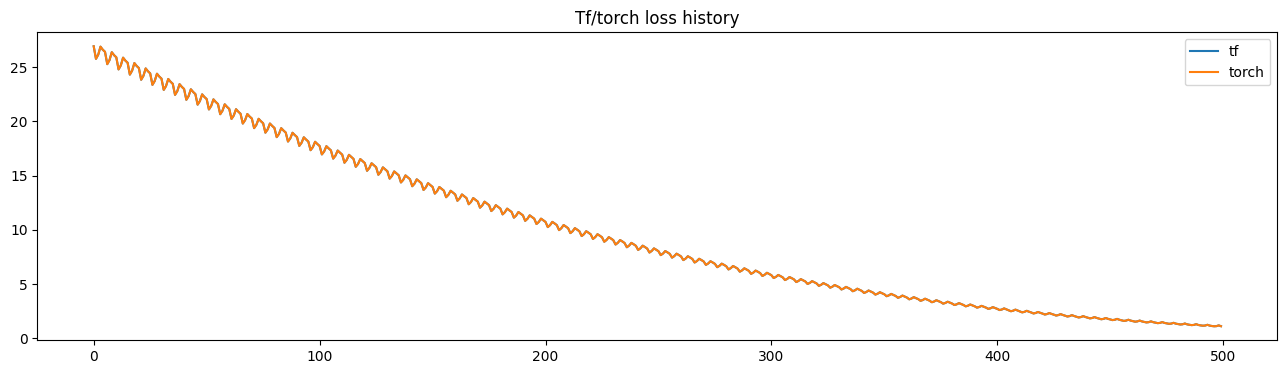

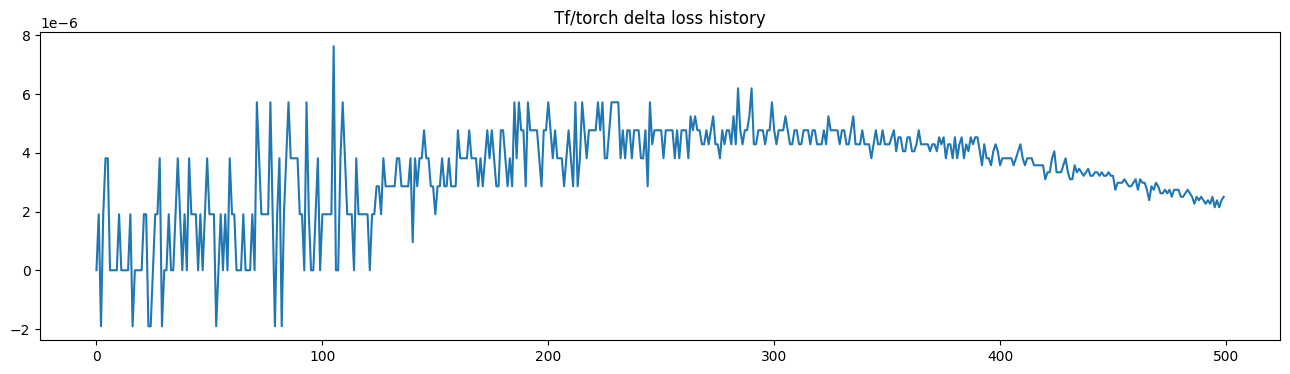

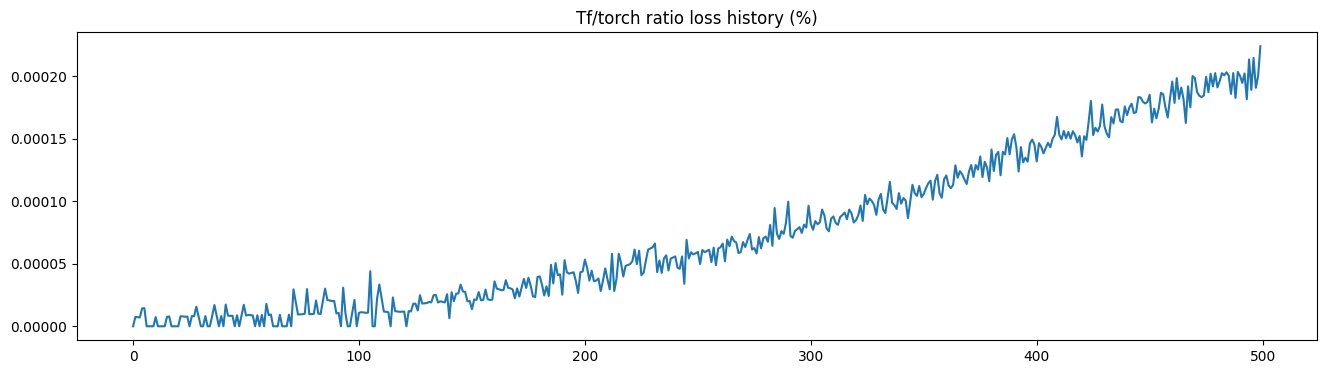




Training model with following params
{'learning_rate': 0.001, 'beta_1': 0.98, 'beta_2': 0.92, 'beta_3': 0.99, 'weight_decay': 0.1}


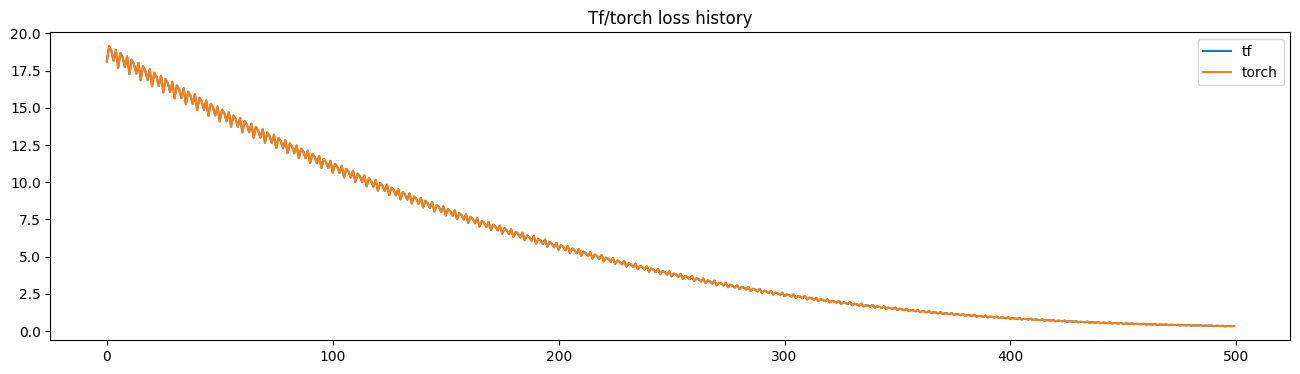

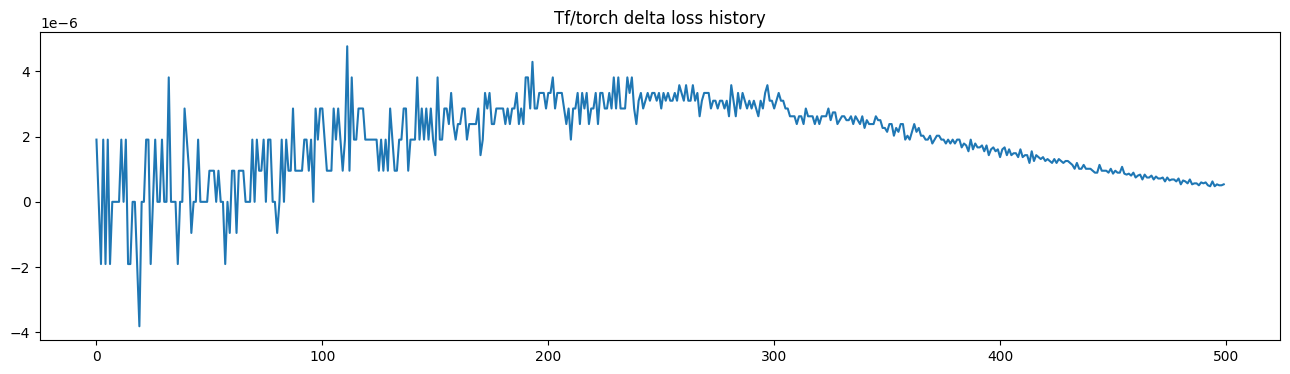

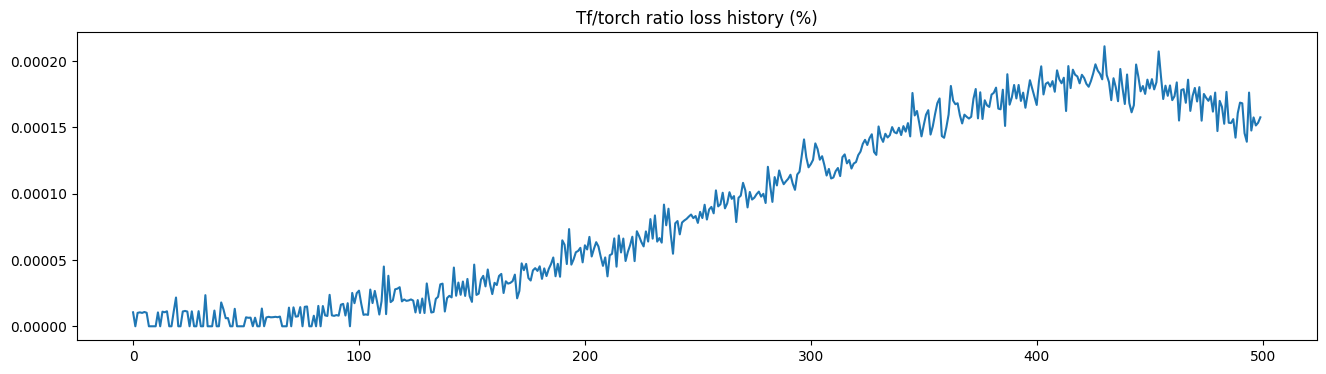




Training model with following params
{'learning_rate': 0.1, 'beta_1': 0.5, 'beta_2': 0.5, 'beta_3': 0.5, 'weight_decay': 0.5}


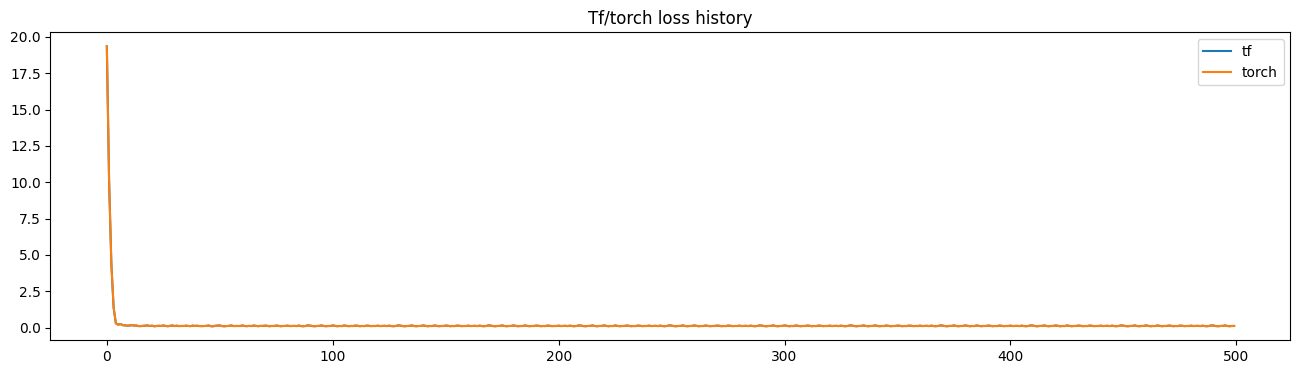

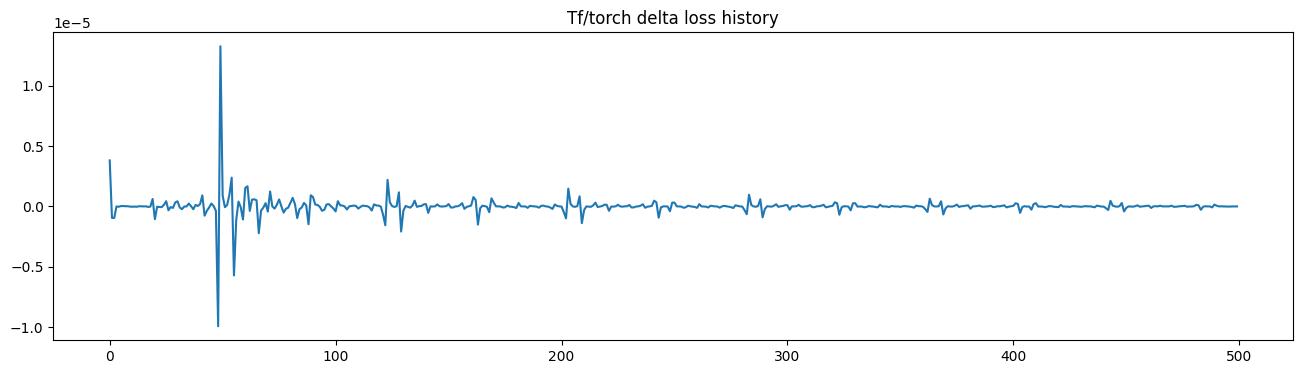

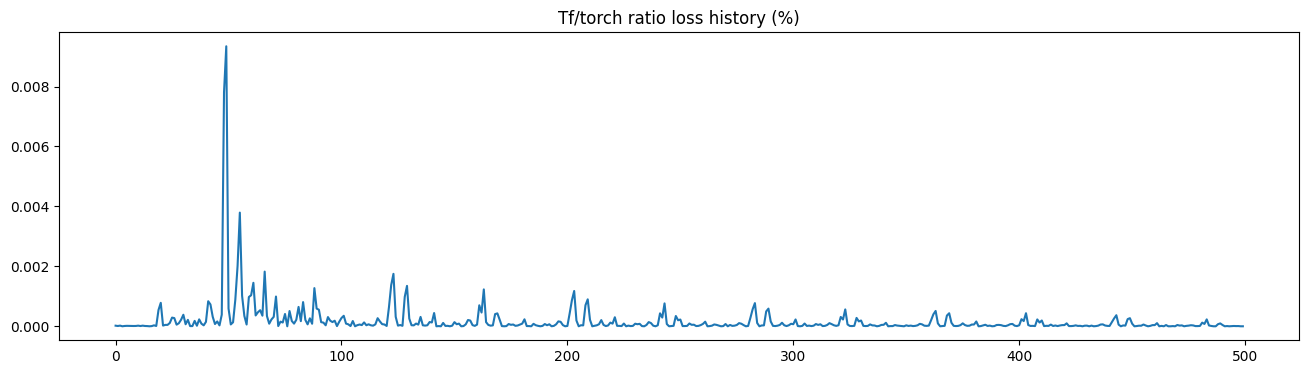




Training model with following params
{'learning_rate': 0.01, 'beta_1': 0.999, 'beta_2': 0.999, 'beta_3': 0.999, 'weight_decay': 0.0}


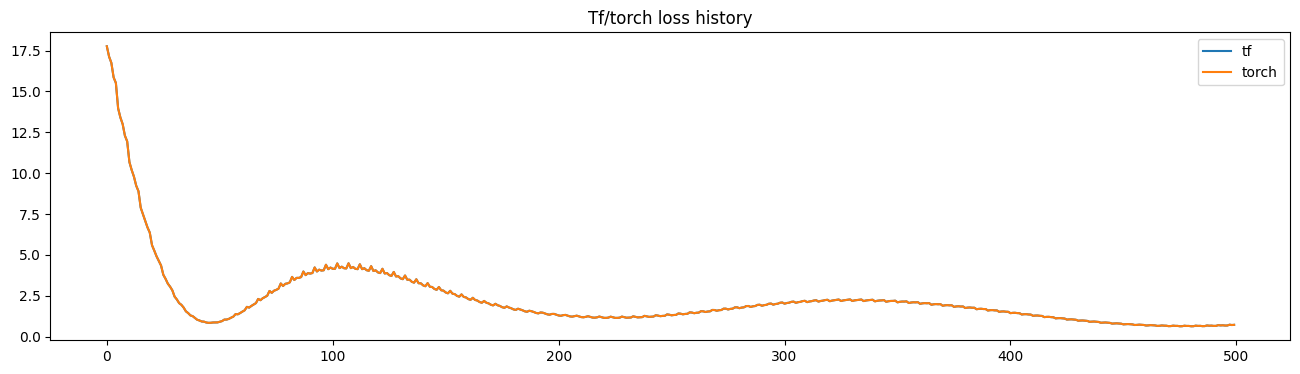

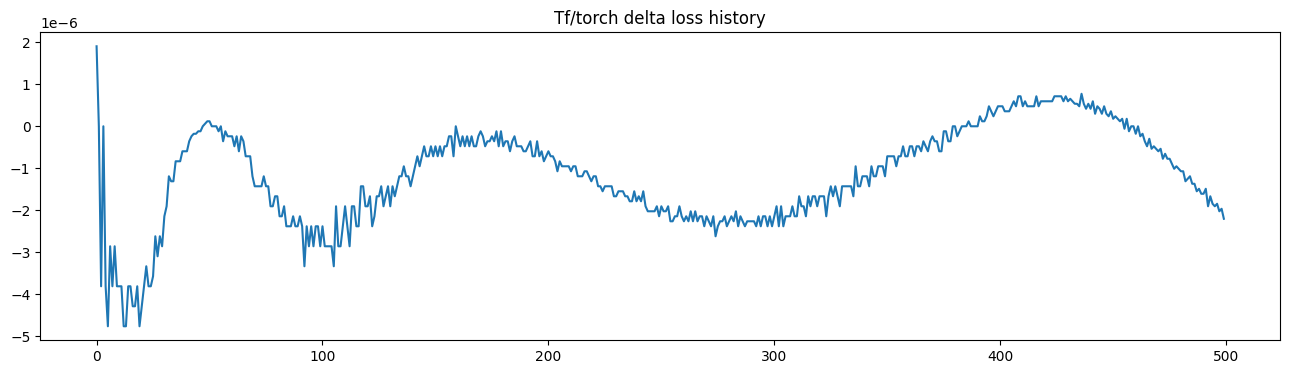

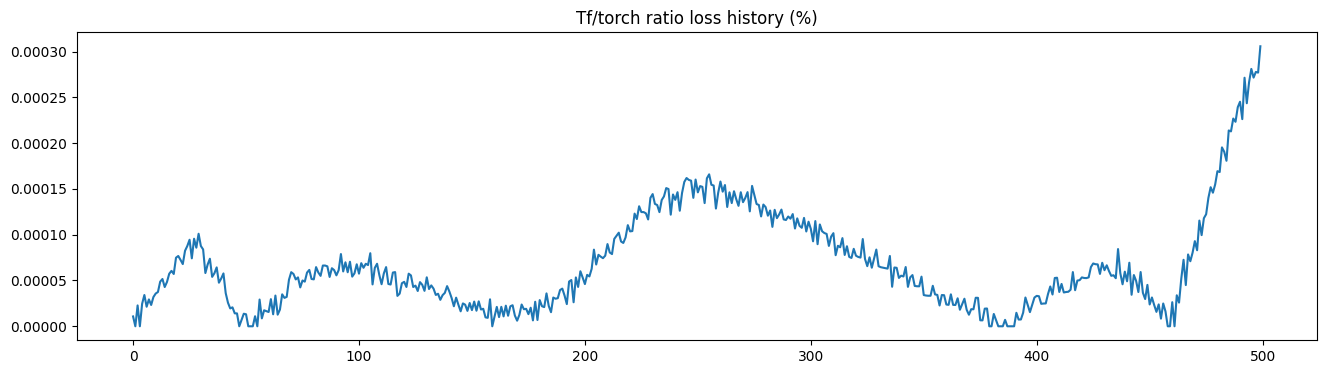




Training model with following params
{'learning_rate': 0.0001, 'beta_1': 0.1, 'beta_2': 0.1, 'beta_3': 0.1, 'weight_decay': 0.2}


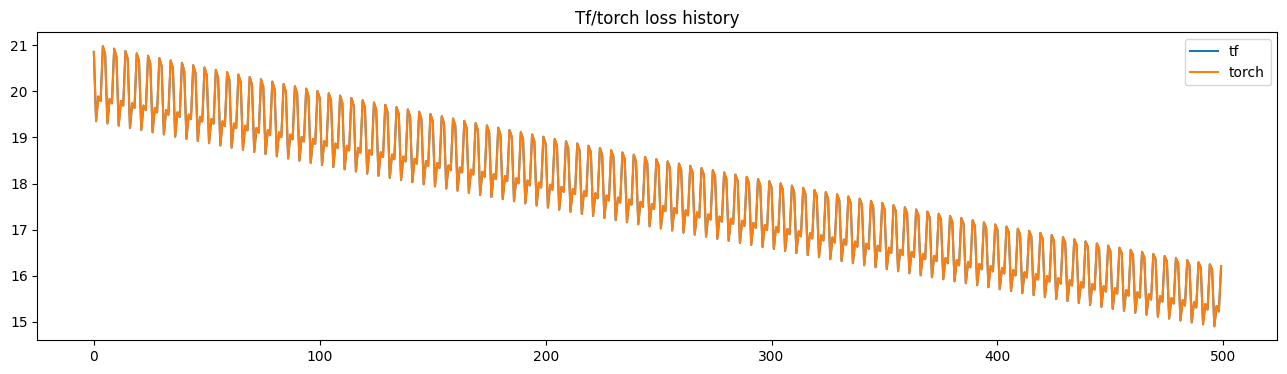

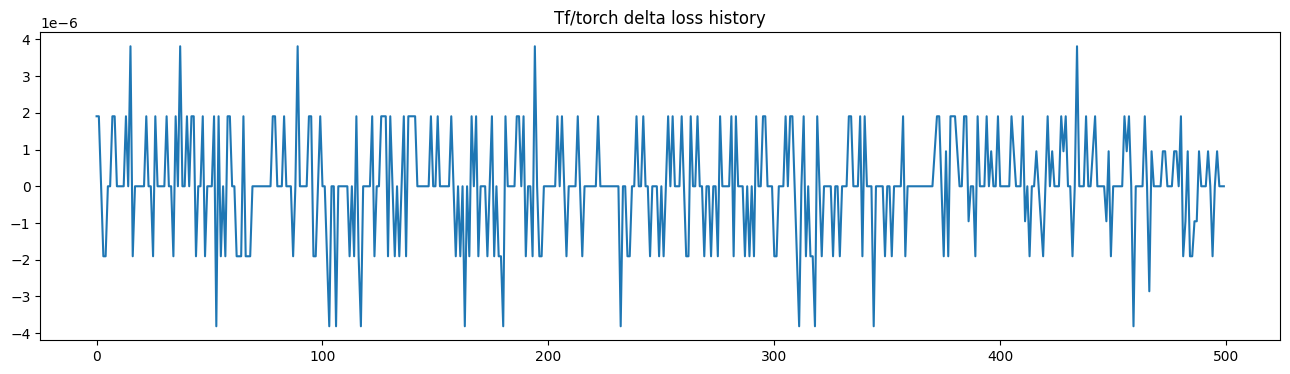

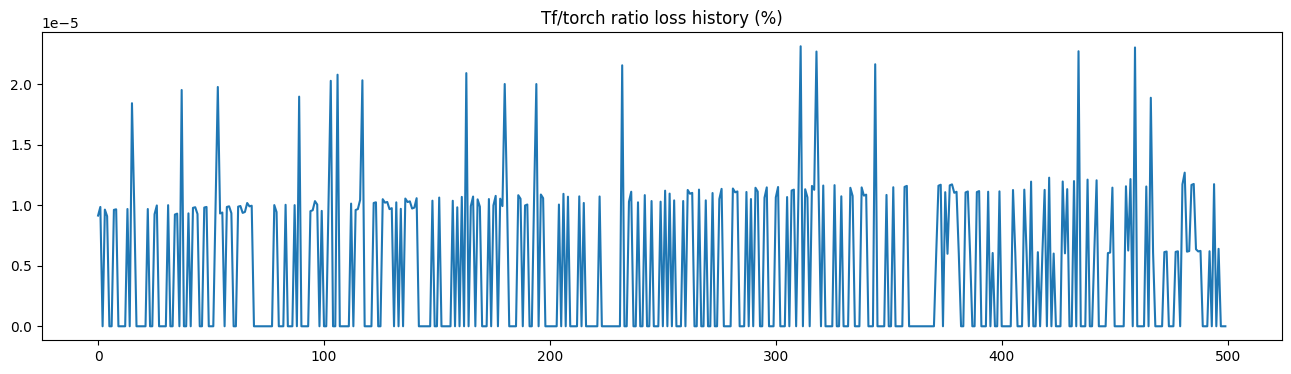

In [6]:
for params in PARAMS_GRID:
    print("Training model with following params")
    print(params)
    results = _test_dense(**params)
    plot_loss_curves_from_results(results)
    print('\n\n')